# О возникновении силы тяги в системе вращающихся зарядов

In [1]:
%%cython
cdef extern from "lw_rotate.c":
    # расчет итерациями запаздывающего момента
    double tlag(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap,
                                          double xc, double yc, double zc,
                                          double R, double omega, double alpha),
               double xc, double yc, double zc,
               double R, double omega, double alpha)
    # отношение радиуса Лиенара Вихерта к радиусу
    double klw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)
    # Радиус Лиенара Вихерта
    double Rlw(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    double philw(double x, double y, double z, double t,
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double q,
               double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
               double xc, double yc, double zc, double R, double omega, double alpha)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(double x, double y, double z, double t,
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
               double q,
               double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                              double xc, double yc, double zc, double R, double omega, double alpha),
           double * A_x, double * A_y, double * A_z,
               double xc, double yc, double zc, double R, double omega, double alpha
           )
    
    void electr_magnet(double x, double y, double z, double t,
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Velocity)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double (*Acceleration)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                double q, double (*Tlag)(double x, double y, double z, double t, 
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                     double (*Coordinate)(double t_zap, double xc, double yc, double zc, double R, double omega, double alpha),
                                         double xc, double yc, double zc, double R, double omega, double alpha), 
                double * E_x, double * E_y, double * E_z, double * B_x, double * B_y, double * B_z,
               double xc, double yc, double zc, double R, double omega, double alpha)

    void set_c(double _c)
    void set_timespan_Epsilon(double _eps)
    double cget_c()
    double cget_timespan_Epsilon()

#sgs 
import numpy as np
cdef double c = np.float128(1)
cdef double timespan_Epsilon = np.float128(1.0e-8)

cdef double R_r = np.float128(10)
cdef double R_l = np.float128(10)
cdef double S = np.float128(0.5)

cdef double v_c = np.float128(0.984)
cdef double omega_d = v_c * c / R_r

print("omega_d =", omega_d)
print(omega_d * R_r / c)
print(omega_d * R_l / c)


cdef double alpha0_l = np.float128(0)
cdef double alpha0_r = np.float128(0)
cdef double omega_l = omega_d
cdef double omega_r = omega_d

# centers of circles
cr = ( S/2+R_r, np.float128(0), np.float128(0))
cl = (-S/2-R_l, np.float128(0), np.float128(0))

cdef double xc_l = cl[0]
cdef double xc_r = cr[0]

cdef double yc_l = cl[1]
cdef double yc_r = cr[1]

cdef double zc_l = cl[2]
cdef double zc_r = cr[2]

cdef double sx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = xc + R*np.cos(current_angle)
    return result
cdef double sy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = yc + R*np.sin(current_angle)
    return result
cdef double sz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = zc
    return result

cdef double vx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*R*np.sin(current_angle)
    return result
cdef double vy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef long double result
    cdef double current_angle = omega * t + alpha
    result = omega*R*np.cos(current_angle)
    return result
cdef double vz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result


cdef double wx(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.cos(current_angle)
    return result
cdef double wy(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    cdef double current_angle = omega * t + alpha
    result = -omega*omega*R*np.sin(current_angle)
    return result
cdef double wz(double t, double xc, double yc, double zc, double R, double omega, double alpha):
    cdef double result
    result = 0
    return result

def R_lw(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))

    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    set_c(c)
    cdef double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, tlag, Xc, Yc, Zc, Rc, Omega, Alpha)

    return r_lw

def phi_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t

    cdef double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    set_c(c)
    cdef double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_, tlag, Xc, Yc, Zc, Rc, Omega, Alpha)

    return philw_


def A_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double A_x
    cdef double A_y
    cdef double A_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha

    
    set_c(c)
    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_, tlag, 
                  &A_x, &A_y, &A_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q_ = q
    
    cdef double E_x
    cdef double E_y
    cdef double E_z
    cdef double B_x
    cdef double B_y
    cdef double B_z
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    
    set_c(c)
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_, tlag, 
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z, Xc, Yc, Zc, Rc, Omega, Alpha)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t, xc, yc, zc, R, omega, alpha):
    cdef double Xa = x
    cdef double Ya = y
    cdef double Za = z
    cdef double ta = t
    cdef double q = 1
    
    cdef double Xc = xc
    cdef double Yc = yc
    cdef double Zc = zc
    cdef double Rc = R
    cdef double Omega = omega
    cdef double Alpha = alpha
    
    
    # расчет итерациями запаздывающего момента
    set_c(c)
    cdef double lag = tlag(Xa, Ya, Za, ta,
                  sx, sy, sz,
                           Xc, Yc, Zc, Rc, Omega, Alpha)
    return lag


def calc_sum_Fy_t(N, S, R_l, R_r, t_i,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  omega_l = omega_d,
                  omega_r = omega_d,
                  to_animate = False,
                  to_log = False):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double Omega_l = - omega_l
    cdef double Omega_r = + omega_r
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Fx_l = 0.0
    cdef double Fy_l = 0.0
    cdef double Fx_r = 0.0
    cdef double Fy_r = 0.0
    
    #F_alpha_l = []
    #F_alpha_r = []
    frames = []

    for i_a in range(n):
        for i_q in range(n):
            if to_animate:
                from sage.plot.all import Graphics
                p = Graphics()
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            if to_animate:
                if sign_a > 0:
                    color_a = "red"
                else:
                    color_a = "blue"
                if sign_q > 0:
                    color_q = "red"
                else:
                    color_q = "blue"
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            Xa = sx(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Xq = sx(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Ya = sy(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Yq = sy(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            Za = sz(t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
            Zq = sz(t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
            
            if to_animate:
                from sage.plot.circle import circle
                from sage.plot.line import line
                p += circle((cr[0],cr[1]), R_r)
                p += circle((cl[0],cl[1]), R_l)
                p += line ([(cr[0],cr[1]), (Xq, Yq)], color = color_q, linestyle="solid")
                p += line ([(cl[0],cl[1]), (Xa, Ya)], color = color_a, linestyle="solid")
                
                # время запаздывания поля правого заряда в области левого заряда
                t2_a = t_lag(Xa, Ya, Za, t_i, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                # запаздывающая координата правого заряда в момент прихода его поля в область левого заряда
                X2_q = sx(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                Y2_q = sy(t2_a, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)
                
                # время запаздывания поля левого заряда в области правого заряда
                t2_q = t_lag(Xq, Yq, Zq, t_i, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                # запаздывающая координата левого заряда в момент прихода его поля в область правого заряда
                X2_a = sx(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                Y2_a = sy(t2_q, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)
                
                if (to_log):
                    print("t2_a=%f t2_q=%f t2_a*omega_d/2pi=%f t2_q*omega_d/2pi=%f" % (t2_a, t2_q, t2_a*omega_d/(2*np.pi), t2_q*omega_d/(2*np.pi)))
            
            # поле создаваемое правым вращающимся зарядом в области левого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            # сила действующая на левый заряд со стороны поля правого заряда
            fx_l = (E_x)*sign_a
            fy_l = (E_y)*sign_a

            Fx_l += fx_l
            Fy_l += fy_l
            
            # поле создаваемое левым вращающимся зарядом в области правого вращающегося заряда
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xq, Yq, Zq, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            # сила действующая на правый заряд со стороны поля левого заряда
            fx_r = (E_x)*sign_q
            fy_r = (E_y)*sign_q
            
            Fx_r += fx_r
            Fy_r += fy_r
            
            if to_animate:
                p += line ([(Xq, Yq), (X2_a, Y2_a)], color = "green", linestyle="dashed")
                p += line ([(X2_q, Y2_q), (Xa, Ya)], color = "green", linestyle="dashed")
                p += line ([(cr[0],cr[1]), (X2_q, Y2_q)], color = color_q, linestyle="dashed")
                p += line ([(cl[0],cl[1]), (X2_a, Y2_a)], color = color_a, linestyle="dashed")

            if to_log:
                print("fx_l=%f fy_l=%f fx_r=%f fy_r=%f" % (fx_l, fy_l, fx_r, fy_r))
            if to_animate:
                p.show(aspect_ratio = 1)
                frames += [p]

    # Интегральная величина тяги в направлении оси y
    # угловое усилие

    return Fy_r + Fy_l

def calc_Maxwells_stress_tensor(X_a, Y_a, Z_a, t_i, N, S, R_l, R_r,
                                cos_nx, cos_ny, cos_nz,
                                alpha0_l = np.float128(0),
                                alpha0_r = np.float128(0),
                                omega_l = omega_d,
                                omega_r = omega_d):
    
    cdef int n = N
    cdef double sign_a
    cdef double sign_q
    
    cdef double Alpha_l
    cdef double Alpha_r
    
    cdef double Omega_l = - omega_l
    cdef double Omega_r = + omega_r
    
    cdef double Xa, Ya, Za
    cdef double Xq, Yq, Zq

    # current positions of rotated masses
    sign_r = []
    sign_l = []
    alpha_r = []
    alpha_l = []
    
    # n - number of charges per circle
    for i in range(n):
        sign_r += [lambda i=i : -((i%2)*2-1)]
        sign_l += [lambda i=i :   (i%2)*2-1]

        alpha_r += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_r]
        alpha_l += [lambda i=i : i * np.float128(2*np.pi)/n + alpha0_l]

    cdef double Ex = 0
    cdef double Ey = 0
    cdef double Ez = 0
    
    cdef double Hx = 0
    cdef double Hy = 0
    cdef double Hz = 0


    for i_a in range(n):
        for i_q in range(n):
            i_l = i_a 
            i_r = i_q
            
            sign_a = sign_l[i_a]()
            sign_q = sign_r[i_q]()
            
            Alpha_l = np.pi - alpha_l[i_a]()
            Alpha_r = alpha_r[i_q]()
            
            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_q, xc_r, yc_r, zc_r, R_r, Omega_r, Alpha_r)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            

            (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(X_a, Y_a, Z_a, t_i, sign_a, xc_l, yc_l, zc_l, R_l, Omega_l, Alpha_l)

            Ex += E_x
            Ey += E_y
            Ez += E_z
            
            Hx += B_x
            Hy += B_y
            Hz += B_z
            
    cdef double sigma_xx = 1/(4*np.pi)*( - Ex*Ex - Hx*Hx + Ey*Ey + Ez*Ez + Hy*Hy + Hz*Hz)
    cdef double sigma_yy = 1/(4*np.pi)*( - Ey*Ey - Hy*Hy + Ez*Ez + Ex*Ex + Hz*Hz + Hx*Hx)
    cdef double sigma_zz = 1/(4*np.pi)*( - Ez*Ez - Hz*Hz + Ex*Ex + Ey*Ey + Hx*Hx + Hy*Hy)
    
    cdef double sigma_xy = 1/(4*np.pi)*( - Ex*Ey - Hx*Hy )
    cdef double sigma_xz = 1/(4*np.pi)*( - Ex*Ez - Hx*Hz )
    cdef double sigma_yz = 1/(4*np.pi)*( - Ey*Ez - Hy*Hz )

    cdef double sigma_yx = 1/(4*np.pi)*( - Ey*Ex - Hy*Hx )
    cdef double sigma_zx = 1/(4*np.pi)*( - Ez*Ex - Hz*Hx )
    cdef double sigma_zy = 1/(4*np.pi)*( - Ez*Ey - Hz*Hy )
    
    #T = [[sigma_xx, sigma_xy, sigma_xz],
    #     [sigma_yx, sigma_yy, sigma_yz],
    #     [sigma_zx, sigma_zy, sigma_zz]]
    

    cdef double fy = (sigma_yx * cos_nx + sigma_yy * cos_ny + sigma_yz * cos_nz)
    
    cdef double S_x = 1/(4*np.pi)*(Ey * Hz - Ez * Hy)
    cdef double S_y = 1/(4*np.pi)*(Ez * Hx - Ex * Hz)
    cdef double S_z = 1/(4*np.pi)*(Ex * Hy - Ey * Hx)


    return fy

def get_omega_d():
    return omega_d
def get_S():
    return S
def get_R_l():
    return R_l
def get_R_r():
    return R_r
def get_c():
    return cget_c()
def get_timespan_Epsilon():
    return cget_timespan_Epsilon()

def get_xc_r():
    return xc_r

def get_yc_r():
    return yc_r

def get_zc_r():
    return zc_r

set_c(c)
set_timespan_Epsilon(timespan_Epsilon)

omega_d = 0.0984
0.984
0.984


In [2]:
print("omega_d =", get_omega_d())
print("timespan_Epsilon =", get_timespan_Epsilon())
print("c =", get_c())
print("v_c =", get_omega_d() * get_R_r() / get_c())
print("v_c =", get_omega_d() * get_R_l() / get_c())


calc_sum_Fy_t(N = 1, S = get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = 0.0,
                  alpha0_l = np.float128(0),
                  alpha0_r = np.float128(0),
                  omega_l = get_omega_d(),
                  omega_r = get_omega_d())

omega_d = 0.0984
timespan_Epsilon = 1e-08
c = 1.0
v_c = 0.984
v_c = 0.984


0.0022171743822235156

In [3]:
from scipy import integrate as scipy_integrate

# epsabs
# float or int, optional
# Absolute error tolerance.
# Default is 1.49e-8.
# quad tries to obtain an accuracy of abs(i-result) <= max(epsabs, epsrel*abs(i))
# where i = integral of func from a to b, and result is the numerical approximation. See epsrel below.

# epsrel
# float or int, optional
# Relative error tolerance.
# Default is 1.49e-8.
# If epsabs <= 0, epsrel must be greater than both 5e-29 and 50 * (machine epsilon). See epsabs above.

# limit
# float or int, optional
# An upper bound on the number of subintervals used in the adaptive algorithm.

#Returns:
# result
# float
# The result of the integration.

# abserr
# float
# The maximum of the estimates of the absolute error in the various integration results.

# out_dict
# dict, optional
# A dict containing additional information on the integration.



nquad_default_opts = \
           { 'epsabs' : 1.49e-08,
             'epsrel' : 1.49e-08,
             'limit'  : 50 }

nquad_opts_2 = { 'epsabs' : 1.0e-03,
                 'epsrel' : 1.0e-03,
                 'limit'  : 50 }

nquad_opts_3 = { 'epsabs' : 1.0e-01,
                 'epsrel' : 1.0e-03,
                 'limit'  : 100 }
 
#nquad_opts = { 'epsabs' : 1.49e-07,
#               'epsrel' : 1.49e-07,
#               'limit'  : 200 }

#nquad_opts = { 'epsabs' : 1.49e-08,
#               'epsrel' : 1.49e-08,
#               'limit'  : 100 }

In [4]:
T = np.float128(2*pi)/get_omega_d() # период вращения
steps_number = 360            # разбиваем период на шаги
dt = T / steps_number               # длительность шага

In [5]:
t_fy = []
for i in range(0, steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i, to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/steps_number, ans)]

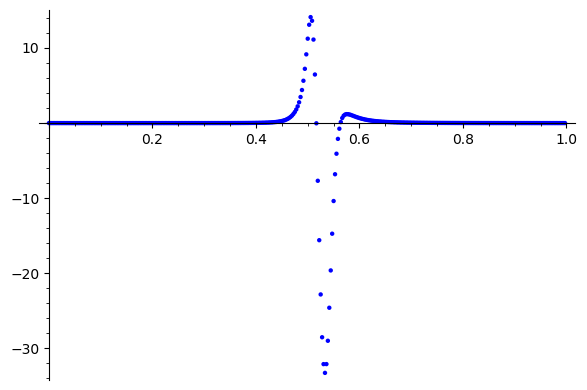

In [6]:
list_plot(t_fy)

In [7]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

-26.082780044610658231

In [8]:
# интегральная сумма силы, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

-0.40847841196995778918

In [ ]:
-0.4084784119723657655

In [ ]:
-0.40847841196897493

In [9]:
# интеграл силы по периоду
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t, to_animate=False), \
        0, T)
ans
# (-8.721028191840928e-10, 3.5107927765742514e-09)

(-26.0827800445479, 1.109864501374464e-08)

In [10]:
# интеграл силы, приложенной к зарядам, по периоду отнесённый к периоду
ans[0]/T

-0.40847841196897493

In [ ]:
-0.40847841196897493

In [11]:
t_fy = []
for i in range(0, steps_number):
    t_i = i * dt
    ans = calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t_i, to_animate=False)
    #print(i, (i/steps_number).n(), t_i, ans)
    t_fy += [(i/steps_number, ans)]

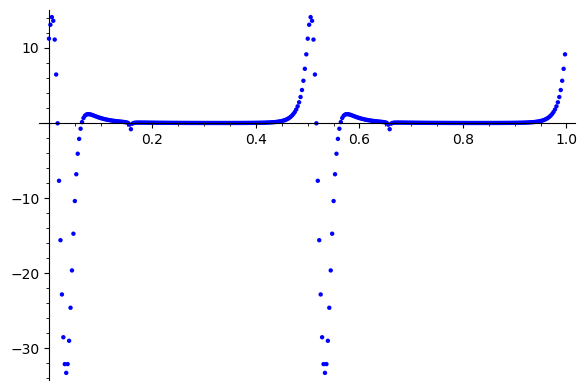

In [12]:
list_plot(t_fy)

In [13]:
# интегральная сумма силы по периоду
sum_fy = 0
for (t_i, fy) in t_fy:
    sum_fy += fy * dt
sum_fy

-53.292286014819468646

In [14]:
# интегральная сумма силы по периоду отнесённая к периоду
sum_fy / T

-0.83460230559587930097

In [15]:
ans = scipy_integrate.quad(lambda t : \
    calc_sum_Fy_t(N=2, S=get_S(), R_l=get_R_l(), R_r=get_R_r(), t_i = t, to_animate=False), \
        0, T)
ans

(-52.10144811710936, 3.8562985853543563e-07)

In [16]:
# интеграл силы по периоду отнесённый к периоду
ans[0]/T

-0.81595277619225365246

In [17]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-10), np.float128(+40), 30*2)
ya_linspace = np.linspace(np.float128(-15), np.float128(+15), 20*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), get_omega_d(), alpha=0)
        rlw_[iy][ix] = R

        #(E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        #S_x = E_y * B_z - E_z * B_y
        #S_y = E_z * B_x - E_x * B_z
        #S_z = E_x * B_y - E_y * B_x
        #sx_[iy][ix] = S_x
        #sy_[iy][ix] = S_y
        #sz_[iy][ix] = S_z
        
        (A_x, A_y, A_z) = A_lw(Xa, Ya, Za, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), get_omega_d(), alpha=0)
        ax_[iy][ix] = A_x

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        phi_ = phi_lw(Xa, Ya, 0, t_cur, q, get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), get_omega_d(), alpha=0)
        s_[iy][ix] = phi_
        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

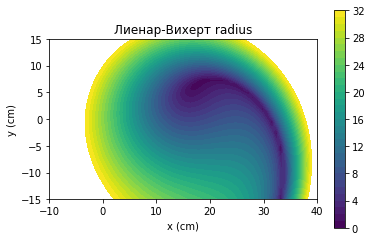

In [18]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(0, 32, 32/1+1))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

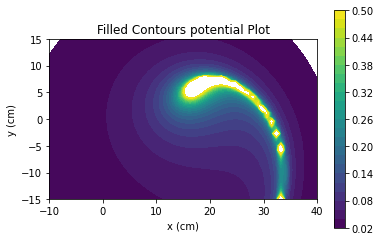

In [19]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.02, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

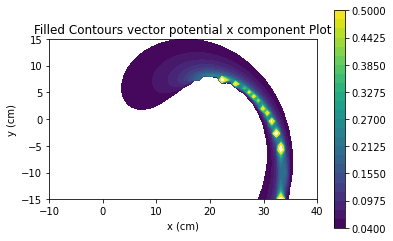

In [20]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

Начинаем расчёт силы интегрального давления поля на воображаемый ящик сферической формы окружающий систему зарядов (пусть например "ящик" будет идеально поглощающим излучение).

для расчёта направляющих косинусов нормали к площадке интегрирования при интегрировании по поверхности сферы нам нужен

${\displaystyle {\boldsymbol {\hat {r}}}=\sin \theta \cos \varphi {\boldsymbol {\hat {\imath }}}+\sin \theta \sin \varphi {\boldsymbol {\hat {\jmath }}}+\cos \theta {\boldsymbol {\hat {k}}}}$

<p>ортогональный единичный вектор сферических координат в направлении увеличения ${\displaystyle r}$, а ${\displaystyle {\boldsymbol {\hat {\imath }}},{\boldsymbol {\hat {\jmath }}},{\boldsymbol {\hat {k}}}}$,
— единичные векторы декартовых координат.</p>

In [21]:
# Интегрируем в сферической системе координат,
# у которой однако в соотвествие с принятыми в задаче
# наименованиями осей главная ось игрек вместо зет
spherical_calc_Maxwells_stress_tensor = lambda r, theta, varphi, t : \
    calc_Maxwells_stress_tensor(X_a = r*sin(theta)*cos(varphi),
                                Y_a = r*cos(theta),
                                Z_a = r*sin(theta)*sin(varphi),
                                t_i = t,
                                N = 1, S=get_S(), R_l=get_R_l(), R_r=get_R_r(),
                                cos_nx=sin(theta)*cos(varphi),
                                cos_ny=cos(theta),
                                cos_nz=sin(theta)*sin(varphi))

In [22]:
# радиус сферы интегрирования
R = 4 * get_R_l() + 2 * get_S()
R, R^2

(41.0, 1681.0)

In [23]:
spherical_calc_Maxwells_stress_tensor_R_t = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [24]:
stress_tensor_upper_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi/2],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [25]:
stress_tensor_down_half_sphere_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [pi/2, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [26]:
stress_tensor_R_t = lambda t :  scipy_integrate.nquad( \
    lambda theta, varphi : \
      spherical_calc_Maxwells_stress_tensor_R_t(theta = theta, varphi = varphi, t = t), \
        [ [0, pi],  [0, 2*pi]], opts=nquad_opts_2)
#          theta     varphi

In [27]:
T = np.float128(2*pi)/get_omega_d() # период вращения
steps_number = 360             # разбиваем период на шаги
dt = T / steps_number               # длительность шага

In [28]:
t_py = []
t_py_up = []
t_py_dw = []
for i in range(0, steps_number):
    t_i = i * dt
    #ans = stress_tensor_R_t(t_i)
    #print(i, (i/steps_number).n(), t_i, ans)
    ans_up = stress_tensor_down_half_sphere_R_t(t_i)
    print(i, (i/steps_number).n(), t_i, ans_up)
    ans_dw = stress_tensor_upper_half_sphere_R_t(t_i)
    print(i, (i/steps_number).n(), t_i, ans_dw)
    print(i, (i/steps_number).n(), t_i, ans_up[0]+ans_dw[0])
    t_py_up += [(t_i, ans_up[0])]
    t_py_dw += [(t_i, ans_dw[0])]
    t_py += [(t_i, ans_up[0]+ans_dw[0])]

0 0.000000000000000 0.0 (-0.014865353820913411, 0.0007080484731062175)


/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0 0.000000000000000 0.0 (1.639510855836717, 0.0018239132906376354)
0 0.000000000000000 0.0 1.6246455020158037
1 0.00277777777777778 0.17737085894251315904 (-0.015587502689752895, 0.0007975215239975565)
1 0.00277777777777778 0.17737085894251315904 (1.495325468017468, 0.0009822093165012813)
1 0.00277777777777778 0.17737085894251315904 1.479737965327715
2 0.00555555555555556 0.35474171788502631807 (-0.016375175316542333, 0.0006080935814637256)
2 0.00555555555555556 0.35474171788502631807 (1.3512745439393226, 0.0010012195837043603)
2 0.00555555555555556 0.35474171788502631807 1.3348993686227801
3 0.00833333333333333 0.5321125768275394771 (-0.017237260639463063, 0.00012984961074878295)
3 0.00833333333333333 0.5321125768275394771 (1.2070715950551736, 0.0010433619583770093)
3 0.00833333333333333 0.5321125768275394771 1.1898343344157105
4 0.0111111111111111 0.70948343577005263614 (-0.018180653804412222, 0.0001373617364805492)
4 0.0111111111111111 0.70948343577005263614 (1.062411530775491, 0.00

35 0.0972222222222222 6.207980062987960566 (-9.338904416416735, 0.0009678112241421899)
35 0.0972222222222222 6.207980062987960566 (0.00368266705344813, 5.37087446573374e-05)
35 0.0972222222222222 6.207980062987960566 -9.335221749363287
36 0.100000000000000 6.3853509219304737253 (-10.50525360504905, 0.008414448101957892)
36 0.100000000000000 6.3853509219304737253 (0.0036721697801201324, 1.0556256069448627e-05)
36 0.100000000000000 6.3853509219304737253 -10.50158143526893
37 0.102777777777778 6.562721780872986884 (-11.871062002763875, 0.009087670086302069)
37 0.102777777777778 6.562721780872986884 (0.0036592970643768144, 6.019749288496763e-07)
37 0.102777777777778 6.562721780872986884 -11.867402705699497
38 0.105555555555556 6.7400926398155000434 (-13.487173031982206, 0.006215756010128581)
38 0.105555555555556 6.7400926398155000434 (0.0036451604610184224, 8.354180884177953e-07)
38 0.105555555555556 6.7400926398155000434 -13.483527871521186
39 0.108333333333333 6.9174634987580132022 (-15.

70 0.194444444444444 12.415960125975921132 (-4.178682433313048, 0.009108925794141243)
70 0.194444444444444 12.415960125975921132 (0.0037023399192124603, 0.00011622996256102256)
70 0.194444444444444 12.415960125975921132 -4.1749800933938355
71 0.197222222222222 12.593330984918434292 (-3.3183404110147747, 0.0020173929556626304)
71 0.197222222222222 12.593330984918434292 (0.003734502474083819, 0.00018317265706258357)
71 0.197222222222222 12.593330984918434292 -3.314605908540691
72 0.200000000000000 12.770701843860947451 (-2.5576124479720854, 0.003439073819570204)
72 0.200000000000000 12.770701843860947451 (0.003770295659817422, 7.716697670651718e-08)
72 0.200000000000000 12.770701843860947451 -2.553842152312268
73 0.202777777777778 12.9480727028034606095 (-1.880670491421831, 0.002570076167415891)
73 0.202777777777778 12.9480727028034606095 (0.003810153537982305, 7.03767077623813e-08)
73 0.202777777777778 12.9480727028034606095 -1.8768603378838489
74 0.205555555555556 13.125443561745973768

105 0.291666666666667 18.623940188963881698 (-0.005182975599073773, 0.0009804197909318423)
105 0.291666666666667 18.623940188963881698 (6.481574030911251, 0.013250156461607626)
105 0.291666666666667 18.623940188963881698 6.476391055312177
106 0.294444444444444 18.801311047906394857 (-0.005783010315360282, 0.0009530976174726654)
106 0.294444444444444 18.801311047906394857 (6.6396409947596995, 0.009540736808814287)
106 0.294444444444444 18.801311047906394857 6.633857984444339
107 0.297222222222222 18.978681906848908018 (-0.006168127019410529, 0.0008184928645760315)
107 0.297222222222222 18.978681906848908018 (6.7970407668979655, 0.01373016474164146)
107 0.297222222222222 18.978681906848908018 6.790872639878555
108 0.300000000000000 19.156052765791421176 (-0.006430898270393873, 0.0009891249119219712)
108 0.300000000000000 19.156052765791421176 (6.953960602974157, 0.010429157678874645)
108 0.300000000000000 19.156052765791421176 6.947529704703763
109 0.302777777777778 19.333423624733934335

139 0.386111111111111 24.654549393009329105 (12.01210456230671, 0.009997001964505259)
139 0.386111111111111 24.654549393009329105 12.007657163625316
140 0.388888888888889 24.831920251951842264 (-0.004380712691200261, 0.00044404481407322365)
140 0.388888888888889 24.831920251951842264 (12.188536577985749, 0.0013842686097444157)
140 0.388888888888889 24.831920251951842264 12.18415586529455
141 0.391666666666667 25.009291110894355425 (-0.004316069342069366, 0.00042823696605628995)
141 0.391666666666667 25.009291110894355425 (12.366102207697423, 0.009262257049861944)
141 0.391666666666667 25.009291110894355425 12.361786138355354
142 0.394444444444444 25.186661969836868584 (-0.004253411217115338, 0.0004125868703507308)
142 0.394444444444444 25.186661969836868584 (12.544822365439327, 0.017393461403598483)
142 0.394444444444444 25.186661969836868584 12.540568954222211
143 0.397222222222222 25.364032828779381742 (-0.004184705418975676, 0.0002569075610815182)
143 0.397222222222222 25.3640328287

174 0.483333333333333 30.862529455997289671 (-0.003002017093385576, 0.00014595943107519163)
174 0.483333333333333 30.862529455997289671 (19.1213332148574, 0.016567882430347985)
174 0.483333333333333 30.862529455997289671 19.118331197764014
175 0.486111111111111 31.039900314939802832 (-0.002979585465636022, 0.0001435244655290304)
175 0.486111111111111 31.039900314939802832 (19.36513700422747, 0.017533057555461667)
175 0.486111111111111 31.039900314939802832 19.362157418761836
176 0.488888888888889 31.21727117388231599 (-0.002957866476874661, 0.00014283484441360606)
176 0.488888888888889 31.21727117388231599 (19.612283567377006, 0.019997696190923175)
176 0.488888888888889 31.21727117388231599 19.60932570090013
177 0.491666666666667 31.39464203282482915 (-0.002936839828310965, 0.0001420733899947189)
177 0.491666666666667 31.39464203282482915 (19.862903186700542, 0.0030499441521316673)
177 0.491666666666667 31.39464203282482915 19.85996634687223
178 0.494444444444444 31.572012891767342308 

208 0.577777777777778 36.89313866004273708 (30.52054518014379, 0.015023678417475261)
208 0.577777777777778 36.89313866004273708 30.51798739970273
209 0.580555555555556 37.07050951898525024 (-0.002552824815491163, 0.0002037483147679617)
209 0.580555555555556 37.07050951898525024 (31.0188810673776, 0.029042753426450463)
209 0.580555555555556 37.07050951898525024 31.016328242562107
210 0.583333333333333 37.247880377927763396 (-0.0025481876468284046, 0.0001895786361195116)
210 0.583333333333333 37.247880377927763396 (31.533144313573825, 0.025060198546557277)
210 0.583333333333333 37.247880377927763396 31.530596125926998
211 0.586111111111111 37.425251236870276557 (-0.002543860409694016, 0.00017487950913227344)
211 0.586111111111111 37.425251236870276557 (32.064270427106905, 0.014643947454025849)
211 0.586111111111111 37.425251236870276557 32.06172656669721
212 0.588888888888889 37.602622095812789714 (-0.0025398367592204736, 0.00015984216643362957)
212 0.588888888888889 37.60262209581278971

243 0.675000000000000 43.101118723030697646 (-0.0025790909879781013, 9.519841711481416e-05)
243 0.675000000000000 43.101118723030697646 (72.74847030864487, 0.024540430190794105)
243 0.675000000000000 43.101118723030697646 72.74589121765689
244 0.677777777777778 43.278489581973210804 (-0.0025861436007542024, 9.721235590863818e-05)
244 0.677777777777778 43.278489581973210804 (76.01969216627379, 0.06387034862166091)
244 0.677777777777778 43.278489581973210804 76.01710602267303
245 0.680555555555556 43.455860440915723964 (-0.002593571581397069, 9.838032440724235e-05)
245 0.680555555555556 43.455860440915723964 (79.62892256727102, 0.0741480825541192)
245 0.680555555555556 43.455860440915723964 79.62632899568962
246 0.683333333333333 43.63323129985823712 (-0.002601377026072952, 9.868703960719537e-05)
246 0.683333333333333 43.63323129985823712 (83.63148192392232, 0.05605776786755705)
246 0.683333333333333 43.63323129985823712 83.62888054689626
247 0.686111111111111 43.810602158800750282 (-0.0

277 0.769444444444444 49.131727927076145054 (52.66386030063069, 0.015851781286507105)
277 0.769444444444444 49.131727927076145054 52.660802882381255
278 0.772222222222222 49.30909878601865821 (-0.0030804034764246482, 0.00011629034304022889)
278 0.772222222222222 49.30909878601865821 (49.88370842965084, 0.011781883296487536)
278 0.772222222222222 49.30909878601865821 49.88062802617441
279 0.775000000000000 49.48646964496117137 (-0.003104028313669129, 0.00012725757580243696)
279 0.775000000000000 49.48646964496117137 (47.33053906181363, 0.01153828636432408)
279 0.775000000000000 49.48646964496117137 47.32743503349996
280 0.777777777777778 49.66384050390368453 (-0.0031283082524464906, 0.00013757861011332484)
280 0.777777777777778 49.66384050390368453 (44.977367060628886, 0.017315133010537623)
280 0.777777777777778 49.66384050390368453 44.974238752376436
281 0.780555555555556 49.84121136284619769 (-0.003153259479048649, 0.0001470588835323258)
281 0.780555555555556 49.84121136284619769 (42.

312 0.866666666666667 55.339707990064105618 (-0.004399057374264418, 0.00037028397879817804)
312 0.866666666666667 55.339707990064105618 (13.03758698959656, 0.010825239812664478)
312 0.866666666666667 55.339707990064105618 13.033187932222296
313 0.869444444444444 55.51707884900661878 (-0.004461579386453614, 0.0004320646548814745)
313 0.869444444444444 55.51707884900661878 (12.608375936069352, 0.01024424709381222)
313 0.869444444444444 55.51707884900661878 12.603914356682898
314 0.872222222222222 55.694449707949131936 (-0.0045261962830529376, 0.0004963430268324575)
314 0.872222222222222 55.694449707949131936 (12.193966422633618, 0.009919165079196546)
314 0.872222222222222 55.694449707949131936 12.189440226350566
315 0.875000000000000 55.871820566891645096 (-0.0045930075961368635, 0.0005624867733834236)
315 0.875000000000000 55.871820566891645096 (11.79362359811556, 0.006916757644190197)
315 0.875000000000000 55.871820566891645096 11.789030590519424
316 0.877777777777778 56.04919142583415

346 0.961111111111111 61.370317194109553025 (3.8027850728918513, 0.004767346857501131)
346 0.961111111111111 61.370317194109553025 3.7939693230162232
347 0.963888888888889 61.547688053052066186 (-0.009086236798027393, 1.871776723227527e-05)
347 0.963888888888889 61.547688053052066186 (3.63313387341452, 0.004901544259554358)
347 0.963888888888889 61.547688053052066186 3.624047636616493
348 0.966666666666667 61.725058911994579343 (-0.00937288195663244, 6.321889163797088e-05)
348 0.966666666666667 61.725058911994579343 (3.4665637675553245, 0.004349134657940679)
348 0.966666666666667 61.725058911994579343 3.457190885598692
349 0.969444444444444 61.902429770937092503 (-0.009677096473902231, 0.00014080447204276175)
349 0.969444444444444 61.902429770937092503 (3.302895220610194, 0.0029859850508624497)
349 0.969444444444444 61.902429770937092503 3.293218124136292
350 0.972222222222222 62.079800629879605664 (-0.010000478196516347, 0.00025873451960463584)
350 0.972222222222222 62.079800629879605

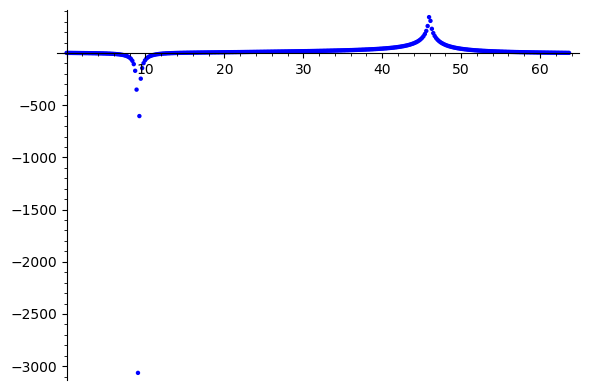

In [29]:
list_plot(t_py)

In [40]:
# интегральная сумма количества импульса, вытекающего в единицу времени из объема воображаемой сферы по периоду
# она же
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду
sum_py = 0
for (t_i, py) in t_py:
    sum_py += py * dt
sum_py

611.95137800112804594

In [41]:
# интегральная сумма силы приложенной к поверхности воображаемой сферы по периоду отнесённая к периоду
sum_py / T

9.583676535292404704

In [8]:
# интегральная сумма силы, приложенной к зарядам, по периоду отнесённая к периоду
sum_fy / T

-0.40847841196995778918

In [42]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через верхнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду
sum_py_up = 0
for (t_i, py) in t_py_up:
    sum_py_up += py * dt
sum_py_up

-976.7566505389089515

In [43]:
# интегральная сумма силы приложенной к поверхности верхней воображаемой полусферы по периоду отнесённая к периоду
sum_py_up / T

-15.296835874505195623

In [44]:
# интегральная сумма по периоду количества импульса,
# вытекающего в единицу времени из объема воображаемой сферы
# через нижнюю полусферу
# она же
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду
sum_py_dw = 0
for (t_i, py) in t_py_dw:
    sum_py_dw += py * dt
sum_py_dw

1588.708028540036992

In [45]:
# интегральная сумма силы приложенной к поверхности нижней воображаемой полусферы по периоду отнесённая к периоду
sum_py_dw / T

24.880512409797600242

In [46]:
spherical_calc_Maxwells_stress_tensor_R = lambda theta, varphi, t : \
     R^2 * spherical_calc_Maxwells_stress_tensor(r = R, theta = theta, varphi = varphi, t = t)

In [ ]:
# "upper\\,half\\,sphere"

Maxwells_stress_tensor_R_upper_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)/2],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts_3)
#                theta                  varphi                   t

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere

In [ ]:
# "down\\,half\\,sphere"

Maxwells_stress_tensor_R_down_half_sphere = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [np.float128(pi)/2, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R_upper_half_sphere + Maxwells_stress_tensor_R_down_half_sphere

In [ ]:
Maxwells_stress_tensor_R = scipy_integrate.nquad( \
    spherical_calc_Maxwells_stress_tensor_R, \
        [ [0, np.float128(pi)],  [0, np.float128(2*pi)],  [0, np.float128(2*pi)/get_omega_d()]], opts=nquad_opts)
#                theta                  varphi                   t

In [ ]:
Maxwells_stress_tensor_R
# v_c = np.float128(0.984)
#         result                  abserr
# (-1.553907207973527e-07,  1.0236458948831668)   # 'epsabs' : 1.49e-03, 'epsrel' : 1.49e-03, 'limit'  : 50
# (-1.5539075127251786e-07, 0.009103807089559712) # 'epsabs' : 1.49e-05, 'epsrel' : 1.49e-05, 'limit'  : 200

# 'epsabs' : 1.49e-07, 'epsrel' : 1.49e-07, 'limit'  : 200
# IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
#  the requested tolerance from being achieved.  The error may be 
#  underestimated.

In [ ]:
calc_sum_Fy_t(N=1, S=S, R_l=R_l, R_r=R_r, t_i = 1)